In [1]:
# imports
import sys
import pandas as pd
import numpy as np
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import Data.data_provider as dp
import core as cal
from estimators.IR_RF_estimator import IR_RF

In [2]:
# params
calib_methods = cal.calib_methods.copy() #["RF", "Platt" , "ISO", "Rank", "CRF", "VA", "Beta", "Elkan", "tlr", "Line"]
metrics = cal.metrics.copy() #["acc", "auc", "brier", "logloss", "ece", "tce"]

# data_name = "S_trees"
data_name = "synthetic"
plot = True
 
params = {
    "runs": 3,
    "n_tree": [2, 5, 10, 20, 30, 40, 50, 80, 100], 
    "data_size": 1000,
    "n_features": 20,
    "oob": False,
    "test_split": 0.3,
    "calib_split": 0.1
}

In [3]:
data_list = []
calib_results_dict = {}

for exp_trees in params["n_tree"]:

    # Data
    exp_data_name = str(exp_trees) # data_name + "_" + 
    data_list.append(exp_data_name)
    X, y, tp = dp.make_classification_gaussian_with_true_prob(params["data_size"], params["n_features"], 0)
    # X, y = dp.load_data(data_name, "../../")
    
    data_dict = {} # results for each data set will be saved in here.
    for seed in range(params["runs"]): # running the same dataset multiple times
        # split the data
        data = cal.split_train_calib_test(exp_data_name, X, y, params["test_split"], params["calib_split"], seed, tp)

        # train model
        irrf = IR_RF(n_estimators=exp_trees, oob_score=params["oob"], random_state=seed)
        irrf.fit(data["x_train"], data["y_train"])

        # calibration
        res = cal.calibration(irrf, data, calib_methods, metrics) # res is a dict with all the metrics results as well as RF probs and every calibration method decision for every test data point
        data_dict = cal.update_runs(data_dict, res) # calib results for every run for the same dataset is aggregated in data_dict (ex. acc of every run as an array)
        if plot:
            cal.plot_probs(exp_data_name, res, data, calib_methods, seed, True) 
            
    calib_results_dict.update(data_dict) # merge results of all datasets together
    
tables = cal.mean_and_ranking_table(calib_results_dict, metrics, calib_methods, data_list, mean_and_rank=False)

RF unique prob 2 211
RF unique prob 2 205
RF unique prob 2 195
RF unique prob 5 298
RF unique prob 5 299
RF unique prob 5 295
RF unique prob 10 300
RF unique prob 10 300
RF unique prob 10 300
RF unique prob 20 300
RF unique prob 20 300
RF unique prob 20 300
RF unique prob 30 300
RF unique prob 30 300
RF unique prob 30 300
RF unique prob 40 300
RF unique prob 40 300
RF unique prob 40 300
RF unique prob 50 300
RF unique prob 50 300
RF unique prob 50 300
RF unique prob 80 300
RF unique prob 80 300
RF unique prob 80 300
RF unique prob 100 300
RF unique prob 100 300
RF unique prob 100 300


In [6]:
plot_calib_methods = calib_methods
# plot_calib_methods.remove("VA")
plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("tlr")
# plot_calib_methods.remove("CRF")
# plot_calib_methods.remove("RF")

# plot_calib_methods

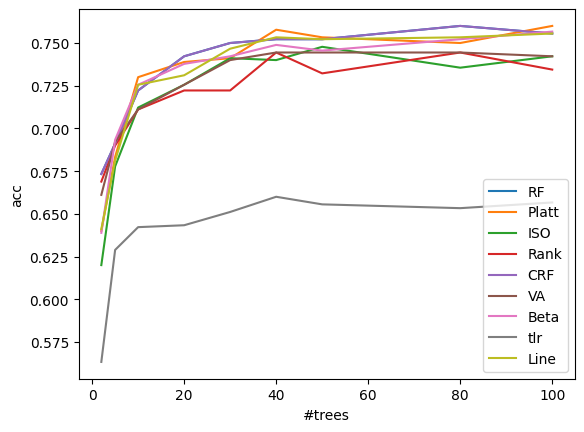

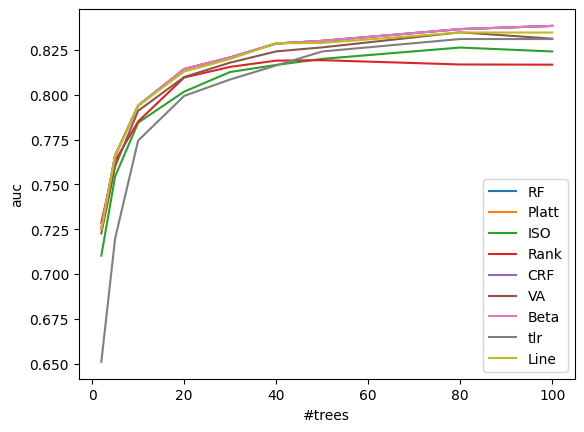

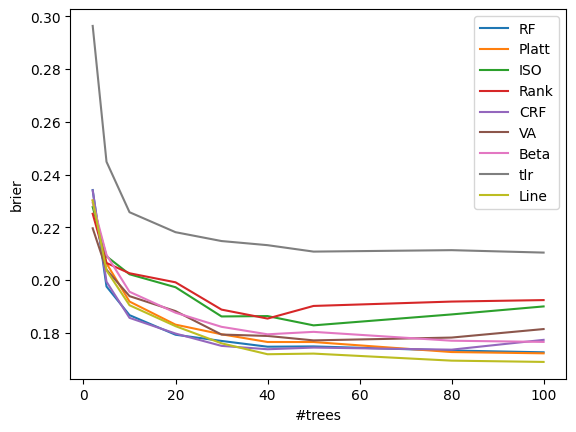

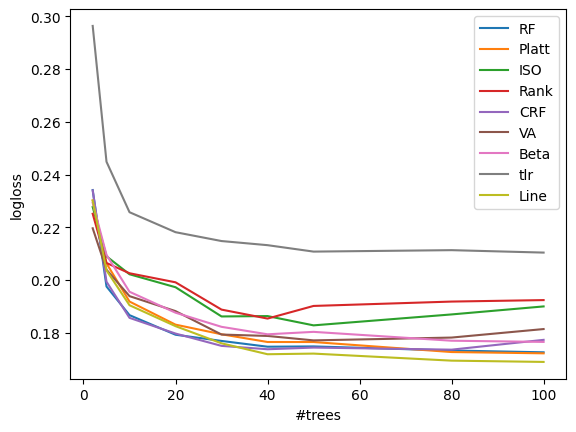

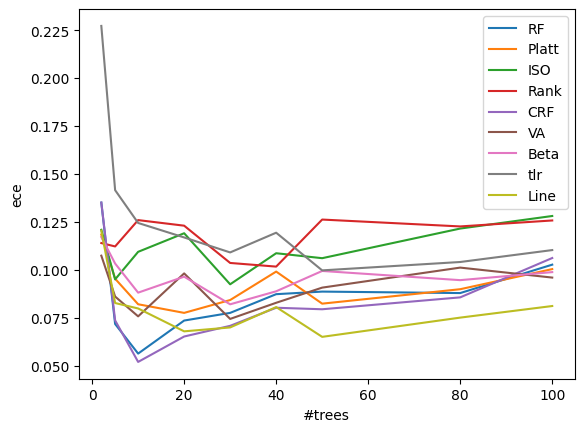

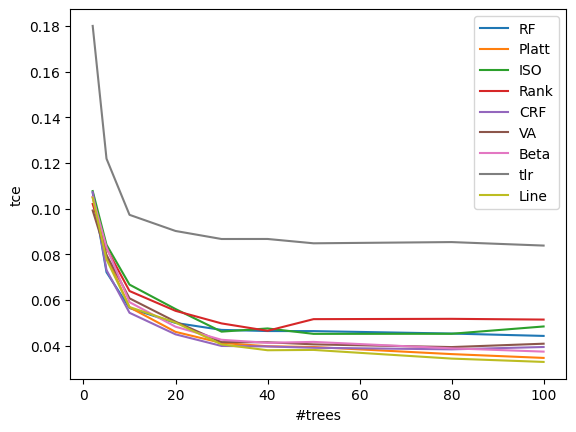

In [7]:
for metric in metrics:
    ax = tables[metric][plot_calib_methods].plot()
    ax.set_xlabel("#trees")
    ax.set_ylabel(metric)